In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import glob
import time

from scipy.stats import mannwhitneyu 

In [2]:
### Graphics parameters:
# ----------------------
size=19
params = {'legend.fontsize': 12,
          'axes.labelsize': 17,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
#           'figure.figsize': (13*0.65,6.5*0.75),
            'axes.titlepad': 10}
plt.rcParams.update(params)

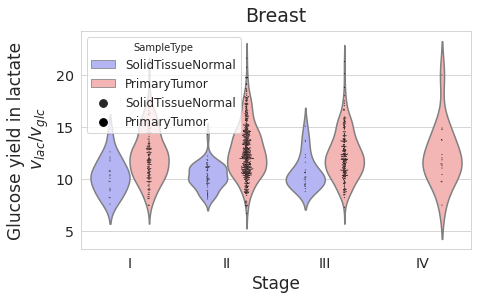

Breast
p-value between normal tissue and tumor tissue per stage
	Stage: I
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.31
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.248
		 MannwhitneyuResult(statistic=2132.0, pvalue=0.00028326788541350756) 

	Stage: II
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.252
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.692
		 MannwhitneyuResult(statistic=21118.0, pvalue=6.040224641213302e-14) 

	Stage: III
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.694
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.292
		 MannwhitneyuResult(statistic=3532.0, pvalue=0.00016894111302831873) 

	Stage: IV
	Average $v_{lac}/v_{glc}$ Normal Tissue: nan
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.236
		 MannwhitneyuResult(statistic=0.0, pvalue=1.0) 




/tmp/ipykernel_154325/3547434031.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
/tmp/ipykernel_154325/3547434031.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])
/opt/Python-3.8.3/lib/python3.8/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
/home/ngonzalez/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ngonzalez/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


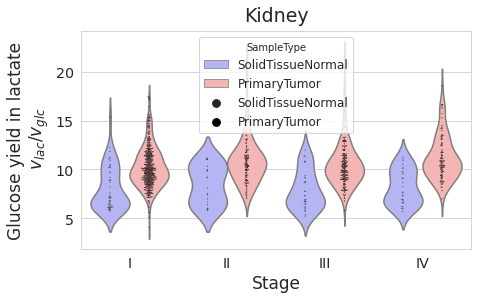

Kidney
p-value between normal tissue and tumor tissue per stage
	Stage: I
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.056
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.258
		 MannwhitneyuResult(statistic=17552.0, pvalue=1.453171470823546e-10) 

	Stage: II
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.472
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.779
		 MannwhitneyuResult(statistic=1626.0, pvalue=5.317708172672836e-05) 

	Stage: III
	Average $v_{lac}/v_{glc}$ Normal Tissue: 7.899
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.491
		 MannwhitneyuResult(statistic=4742.0, pvalue=1.1298826733943636e-08) 

	Stage: IV
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.167
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 11.209
		 MannwhitneyuResult(statistic=2457.0, pvalue=6.138157019738507e-09) 




/tmp/ipykernel_154325/3547434031.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
/tmp/ipykernel_154325/3547434031.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])


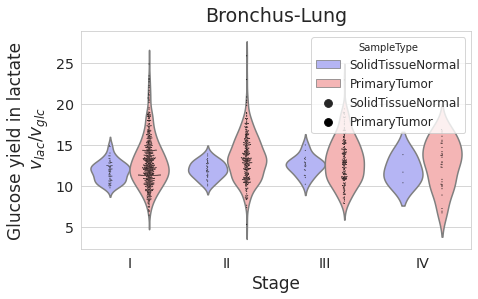

Bronchus-Lung
p-value between normal tissue and tumor tissue per stage
	Stage: I
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.804
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.913
		 MannwhitneyuResult(statistic=18208.0, pvalue=0.0046687053888943685) 

	Stage: II
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.969
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 13.39
		 MannwhitneyuResult(statistic=5786.0, pvalue=0.0007279009124924042) 

	Stage: III
	Average $v_{lac}/v_{glc}$ Normal Tissue: 12.495
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 13.106
		 MannwhitneyuResult(statistic=1697.0, pvalue=0.2107235238629222) 

	Stage: IV
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.937
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.655
		 MannwhitneyuResult(statistic=58.0, pvalue=0.32351536019020505) 




/tmp/ipykernel_154325/3547434031.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
/tmp/ipykernel_154325/3547434031.py:77: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])


In [3]:
### Figure 5:
# -----------
files = ['Breast_fluxesv2.csv', 'Kidney_fluxesv2.csv', 'Bronchus-Lung_fluxesv2.csv']

for i, file in enumerate(files):
    sampleTypes, stages, lactateFluxes=[],[],[]
    allfluxes = pd.read_csv(file, sep='\t', lineterminator='\n').set_index("Reaction")
    # data
    for sample in allfluxes.columns:
        sampleType = sample.split("_")[0]
        stage = sample.split("_")[1]
        
        if sampleType in ["SolidTissueNormal","PrimaryTumor"]:
            # sample type
            sampleTypes.append(sampleType)
            # stage
            if stage=='StageI' or stage=='StageIA' or stage=='StageIB':
                stages.append("I")
            elif stage=='StageII' or stage=='StageIIA' or stage=='StageIIB':
                stages.append("II")
            elif stage=='StageIII' or stage=='StageIIIA' or stage=='StageIIIB' or stage=='StageIIIC':
                stages.append("III")
            elif stage=='StageIV':
                stages.append("IV")
            elif stage=='StageNA':
                stages.append('NN')
            else: # 'StageX'
                stages.append('NN')
            # glucose yield in lactate
            beta = abs(1/allfluxes[sample].loc["R_EX_glc__D_e"])
            lactateFlux = allfluxes[sample].loc['R_EX_lac__L_e']*beta
            lactateFluxes.append(lactateFlux)
    
    # dataframe
    df = pd.DataFrame( data = {"SampleType": sampleTypes, 'Stage': stages, 'LactateFlux': lactateFluxes })
    
    # graphic
    order=["I","II","III","IV"]
    sns.set_style("whitegrid")
    tips = sns.load_dataset("tips")
    palette = sns.color_palette('bwr',n_colors=2,desat=1)
    plt.figure(figsize=(7,4))
    ax = sns.swarmplot(x='Stage',
                       y="LactateFlux",
                       hue="SampleType",
                       hue_order=["SolidTissueNormal","PrimaryTumor"],
                       dodge=True,
                       data=df,
                       size=1,
                       color='black',
                       order=order).set_title('Warburg effect')
    #violinplot
    ax = sns.violinplot(x='Stage',
                        y="LactateFlux",
                        hue="SampleType",
                        hue_order=["SolidTissueNormal","PrimaryTumor"],
                        scale='width', # width or area
                        scale_hue=True,
                        gridsize=1000,
                        dodge=True,
                        inner=None,
                        linewidth=1.5,
                        data=df,
                        palette=palette,
                        order=order).set_title(file.split("_")[0])
    
    plt.ylabel("Glucose yield in lactate\n $v_{lac}/v_{glc}$")
#     plt.savefig('warburgeffect_'+str(i)+'.svg', bbox_inches="tight") #save fig
    plt.show()
    
    # Mann-Whitney test
    print(file.split("_")[0])
    print('p-value between normal tissue and tumor tissue per stage')
    for stage in ['I', 'II', 'III', 'IV']:
        print ('\tStage:', stage)
        normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['Stage']==stage]['LactateFlux'])
        tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['Stage']==stage]['LactateFlux'])
        res = mannwhitneyu(tumorTissue, normalTissue, alternative="greater")
        print('\tAverage $v_{lac}/v_{glc}$ Normal Tissue:', round(np.mean(normalTissue), 3))
        print('\tAverage $v_{lac}/v_{glc}$ Tumor Tissue:', round(np.mean(tumorTissue), 3))
        print ('\t\t',res,"\n")
    print('')

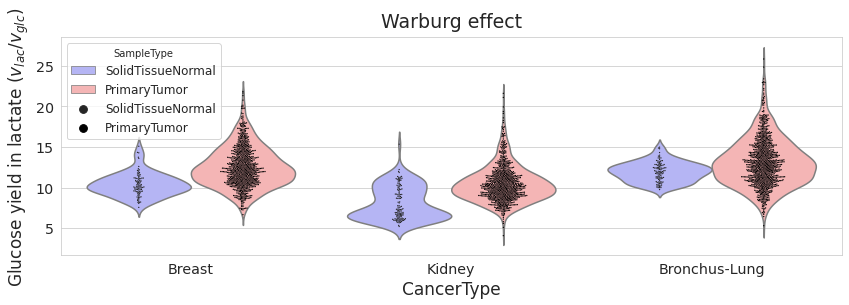

Breast
	Average $v_{lac}/v_{glc}$ Normal Tissue: 10.37178047561462
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 12.532385897311206
		 MannwhitneyuResult(statistic=66721.0, pvalue=8.938732404026978e-20) 

Kidney
	Average $v_{lac}/v_{glc}$ Normal Tissue: 8.10732824824329
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 10.48040132345743
		 MannwhitneyuResult(statistic=89685.0, pvalue=9.352124336517317e-26) 

Bronchus-Lung
	Average $v_{lac}/v_{glc}$ Normal Tissue: 11.956351894250524
	Average $v_{lac}/v_{glc}$ Tumor Tissue: 13.070390473609065
		 MannwhitneyuResult(statistic=69166.0, pvalue=2.599734565752592e-05) 



/tmp/ipykernel_154325/2270871183.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['CancerType']==cancer]['LactateFlux'])
/tmp/ipykernel_154325/2270871183.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['CancerType']==cancer]['LactateFlux'])


In [4]:
### Figure 4:
# -----------
files = ['Breast_fluxesv2.csv', 'Kidney_fluxesv2.csv', 'Bronchus-Lung_fluxesv2.csv']
sampleTypes, cancerTypes, lactateFluxes=[],[],[]
for file in files:
    allfluxes = pd.read_csv(file, sep='\t', lineterminator='\n').set_index("Reaction")
    # data
    for sample in allfluxes.columns:
        sampleType = sample.split("_")[0]
        
        if sampleType in ["SolidTissueNormal","PrimaryTumor"]:
            # sample type
            sampleTypes.append(sampleType)
            # cancer type
            cancerType = file.split("_")[0]
            cancerTypes.append(cancerType)
            # glucose yield in lactate
            beta = abs(1/allfluxes[sample].loc["R_EX_glc__D_e"])
            lactateFlux = allfluxes[sample].loc['R_EX_lac__L_e']*beta
            lactateFluxes.append(lactateFlux)
            
# dataframe
df = pd.DataFrame( data = {'SampleType': sampleTypes,
                           'CancerType': cancerTypes,
                           'LactateFlux': lactateFluxes })

# graphic
order=['Breast', 'Kidney', 'Bronchus-Lung']
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
palette = sns.color_palette('bwr',n_colors=2,desat=1)
plt.figure(figsize=(14,4))

ax = sns.swarmplot(x='CancerType',
                   y="LactateFlux",
                   hue="SampleType",
                   hue_order=["SolidTissueNormal","PrimaryTumor"],
                   dodge=True,
                   data=df,
                   size=1.3,
                   color='black',
                   order=order).set_title('Warburg effect')
#violinplot
ax = sns.violinplot(x='CancerType',
                    y="LactateFlux",
                    hue="SampleType",
                    hue_order=["SolidTissueNormal","PrimaryTumor"],
                    scale='width', # width or area
                    scale_hue=True,
                    gridsize=1000,
                    dodge=True,
                    inner=None,
                    linewidth=1.5,
                    data=df,
                    palette=palette,
                    order=order).set_title('Warburg effect')
plt.ylabel("Glucose yield in lactate ($v_{lac}/v_{glc}$)")
# plt.savefig('warburgeffect.svg', bbox_inches="tight") #save fig

plt.show()

# Mann-Whitney test
for cancer in ['Breast', 'Kidney', 'Bronchus-Lung']:
    print(cancer)
    normalTissue = np.array(df[df['SampleType']=='SolidTissueNormal'][df['CancerType']==cancer]['LactateFlux'])
    tumorTissue = np.array(df[df['SampleType']=='PrimaryTumor'][df['CancerType']==cancer]['LactateFlux'])
    print('\tAverage $v_{lac}/v_{glc}$ Normal Tissue:', np.mean(normalTissue))
    print('\tAverage $v_{lac}/v_{glc}$ Tumor Tissue:', np.mean(tumorTissue))
    res = mannwhitneyu(tumorTissue, normalTissue, alternative="greater")
    print ('\t\t',res,"\n")